### Student ID: 21127275
### Fullname: Võ Thanh Hiệp

In [1]:
# duplicating a vector
def copyVector(vector):
    result = []
    for i in range(len(vector)):
        result.append(vector[i])
    return result

# duplicating a matrix
def copyMatrix(Matrix):
    result = []
    nRow = len(Matrix)
    nColumn = len(Matrix[0])
    
    for i in range(nRow):
        row = []
        for j in range(nColumn):
            row.append(Matrix[i][j])
        result.append(row)
            
    return result

# print the matrix
def printMatrix(Matrix):
    nRow = len(Matrix)
    print('[', end="")
    for i in range(nRow - 1):
        print(Matrix[i])
    print(Matrix[nRow - 1], end="")
    print(']')
    
# subtract 2 vectors
def subtractTwoVectors(vector1, vector2):
    Res_Vector = []
    if len(vector1) != len(vector2):
        print("Cannot add two vectors with different lengths")
        return
    
    length = len(vector1)
    for i in range(length):
        Res_Vector.append(vector1[i] - vector2[i])
        
    return Res_Vector

# calculating the norm of vector
def norm(vector):
    result = 0
    for i in range(len(vector)):
        result += vector[i]**2
    
    return result**(1/2)

In [2]:
# checking whether 2 matrix can multiple with each other
def isValidToMultiple(A, B):
    columnA = len(A[0])
    rowB = len(B)
    
    if columnA == rowB:
        return True
    return False

# calculating dot product of 2 vectors
def dotProduct(fVector, sVector):
    if len(fVector) != len(sVector):
        return "Cannot dot"
    
    result = 0
    for i in range(len(fVector)):
        result += fVector[i] * sVector[i]
        
    return result

# getting the column from a matrix in a particular position
def getColumn(Matrix, pColumn):
    if type(Matrix[0]) is not list:
        return Matrix[pColumn]
    
    nCol = len(Matrix[0])
    if pColumn > nCol:
        return 'Invalid! Column position is not exists'
    
    row = len(Matrix)
    result = []
    for i in range(row):
        result.append(Matrix[i][pColumn])
        
    return result

# multipling 2 matrixs
def multiple2Matrixs(A, B):
    if isValidToMultiple(A, B) == False:
        return 'Invalid! Cannot multiple'
    
    result = []
    row = len(A)
    column = len(B[0]) if type(B[0]) is list else len(B)
    
    for i in range(row):
        line = []
        for j in range(column):
            columnB = getColumn(B, j)
            line.append(dotProduct(A[i], columnB))
        result.append(line)
        
    return result

In [3]:
# transposing the matrix
def transposeMatrix(matrix):
    if type(matrix[0]) is not list:
        transpose_matrix = []
        for i in range(len(matrix)):
            transpose_matrix.append([matrix[i]])
        return transpose_matrix
    
    nRow = len(matrix)
    nCol = len(matrix[0])
    transpose_matrix = []
    
    if nCol == 1:
        for i in range(nRow):
            transpose_matrix.append(matrix[i][0])
        return transpose_matrix
    
    for i in range(nCol):
        line = []
        for j in range(nRow):
            line.append(matrix[j][i])
        transpose_matrix.append(line)
            
    return transpose_matrix

In [4]:
"""
When the lead element is found out. Of course, it values will be 1. In the column includes this cell, 
make all cells above and below it to 0.
"""
def clearColumnIncludeLeadElement(Matrix, cellRow, cellColumn, nRow, nColumn):
    for i in range(cellRow + 1, nRow):
        rate = Matrix[i][cellColumn] / Matrix[cellRow][cellColumn]
        for j in range(cellColumn, nColumn):
            Matrix[i][j] -= rate * Matrix[cellRow][j]
    
    for i in range(cellRow):
        rate = Matrix[i][cellColumn] / Matrix[cellRow][cellColumn]
        for j in range(cellColumn, nColumn):
            Matrix[i][j] -= rate * Matrix[cellRow][j]
            
# Using for inverse fomulation
def clearColumnOf2MatrixsIncludeLeadElement(Matrix, Augmented_Inverse, cellRow, cellColumn, nRow, nColumn):
    for i in range(cellRow + 1, nRow):
        rate = Matrix[i][cellColumn] / Matrix[cellRow][cellColumn]
        for j in range(cellColumn, nColumn):
            Matrix[i][j] -= rate * Matrix[cellRow][j]
        for j in range(nColumn):
            Augmented_Inverse[i][j] -= rate * Augmented_Inverse[cellRow][j]
    
    for i in range(cellRow):
        rate = Matrix[i][cellColumn] / Matrix[cellRow][cellColumn]
        for j in range(cellColumn, nColumn):
            Matrix[i][j] -= rate * Matrix[cellRow][j]
        for j in range(nColumn):
            Augmented_Inverse[i][j] -= rate * Augmented_Inverse[cellRow][j]

# Reducing all values in row by dividing them by the lead element in that row.
def divideRowWithANumber(Row, dividend, n):
    for i in range(n):
        Row[i] /=  dividend

# If the cell at A[cellRow][cellColumn] = 0. Finding the cell below it that different from value 0.
def findLeadPositionBelowCellInColumn(Matrix, cellRow, cellColumn, nRow):
    for i in range(cellRow + 1, nRow):
        if Matrix[i][cellColumn] != 0:
            return i
    return nRow

# checking whether the Matrix is invertible
def checkIfTheMatrixHasInverse(Matrix, nRow, nColumn):
    if nRow < nColumn:
        return False
    
    for i in range(nColumn):
        if Matrix[i][i] != 1:
            return False
        
    for i in range(nColumn):
        for j in range(nColumn):
            if i == j:
                continue
            if Matrix[i][j] != 0:
                return False
            
    for i in range(nColumn, nRow):
        for j in range(nColumn):
            if Matrix[i][j] != 0:
                return False
            
    return True

# calculating inverse matrix
def inverse(A):
    Matrix = copyMatrix(A)
    nRow = len(Matrix)
    nColumn = len(Matrix[0])
    
    result_Matrix = []
    for i in range(nRow):
        result_Matrix.append([0] * nColumn)
        
    for i in range(nRow):
        result_Matrix[i][i] = 1
    
    j = 0
    for i in range(nColumn):
        if Matrix[j][i] == 0:
            rowSwitch = findLeadPositionBelowCellInColumn(Matrix, j, i, nRow)
            if rowSwitch == nRow:
                continue
            Matrix[j], Matrix[rowSwitch] = Matrix[rowSwitch], Matrix[j]
            result_Matrix[j], result_Matrix[rowSwitch] = result_Matrix[rowSwitch], result_Matrix[j]
        
        leadElement = Matrix[j][i]
        divideRowWithANumber(Matrix[j], leadElement, nColumn)
        divideRowWithANumber(result_Matrix[j], leadElement, nColumn)
        clearColumnOf2MatrixsIncludeLeadElement(Matrix, result_Matrix, j, i, nRow, nColumn)
        
        j += 1
        if j == nRow:
            break
            
    if checkIfTheMatrixHasInverse(Matrix, nRow, nColumn) == False:
        return 'Ma trận không khả nghịch'
    
    return result_Matrix

In [5]:
# creating the matrix A with a column 1 in the first
def getA(xs):
    A = []
    if type(xs[0]) is not list:
        for i in range(len(xs)):
            A.append([1, xs[i]])
        return A
    
    for i in range(len(xs)):
        line = [1]
        for j in range(len(xs[0])):
            line.append(xs[i][j])
        A.append(line)
        
    return A

In [6]:
# calculating the Ordinary Least Square
def OLS(A, y):
    transposeA = transposeMatrix(A)
    
    result = multiple2Matrixs(transposeA, A)
    result = inverse(result)
    result = multiple2Matrixs(result, transposeA)
    result = multiple2Matrixs(result, y)
    
    return result

In [7]:
# calculating the Root Mean Square Deviation
def calculateRMSE(A, x, y):
    result = multiple2Matrixs(A, x)
    result = transposeMatrix(result)
    
    y = transposeMatrix(y)
    
    result = subtractTwoVectors(result, y)
    return norm(result)

In [8]:
import pandas as pd
df = pd.read_csv('NHANES_age_prediction.csv')

In [9]:
df

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...,...,...,...
2273,83711.0,Adult,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,83712.0,Adult,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,83713.0,Adult,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99


In [10]:
df = df.drop(columns=['SEQN', 'age_group'])
df

,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...,...
2273,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99


### Problem a

#### Model: $y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + \theta_4x_4 + \theta_5x_5 + \theta_6x_6 + \theta_7x_7$

In [11]:
xs = df.drop(columns=['DIQ010']).values.tolist()
y = df.DIQ010.values.tolist()
y = transposeMatrix(y)

A = getA(xs) # add the column one in the left front

theta = OLS(A, y)
printMatrix(theta)

RMSE = calculateRMSE(A, theta, y)
print()
print("The RMSE:", RMSE)

[[2.0316670739389044]
[0.0005827995219441532]
[-0.01435196539991661]
[0.0004527383849819342]
[0.0003149172663294287]
[-0.000439932134827661]
[1.0603782563941996e-05]
[0.0012553690581378135]]

The RMSE: 8.813941060900078


### Problem b
#### Model: $y = \theta_0 + \theta_1x$

In [12]:
feature_names = df.drop(columns=['DIQ010']).columns.tolist()
feature_names

['RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']

In [13]:
xs[:10]

[[61.0, 2.0, 2.0, 35.7, 110.0, 150.0, 14.91],
 [26.0, 2.0, 2.0, 20.3, 89.0, 80.0, 3.85],
 [16.0, 1.0, 2.0, 23.2, 89.0, 68.0, 6.14],
 [32.0, 1.0, 2.0, 28.9, 104.0, 84.0, 16.15],
 [38.0, 2.0, 1.0, 35.9, 103.0, 81.0, 10.92],
 [50.0, 1.0, 2.0, 23.6, 110.0, 100.0, 6.08],
 [14.0, 1.0, 2.0, 38.7, 94.0, 202.0, 21.11],
 [57.0, 2.0, 2.0, 38.3, 107.0, 164.0, 20.93],
 [75.0, 1.0, 2.0, 38.9, 89.0, 113.0, 17.47],
 [43.0, 1.0, 1.0, 28.9, 90.0, 95.0, 3.24]]

In [14]:
xs = transposeMatrix(xs)

In [15]:
theta_list, rss_list = [], []

for i in range(len(xs)):
    A = getA(xs[i])
    theta = OLS(A, y)
    theta_list.append(transposeMatrix(theta))
    rss = calculateRMSE(A, theta, y)
    rss_list.append(rss)
    
print("The RSS list:")
for i in range(len(xs)):
    print(feature_names[i],':',rss_list[i])
    print('theta_0 =',theta_list[i][0],', theta_1 =',theta_list[i][1])
    print()
print()

minRSS = min(rss_list)
print("The min RSS:", minRSS)
print()

index_min_RSS = rss_list.index(minRSS)
print("The feature have min RSS:", feature_names[index_min_RSS])

The RSS list:
RIDAGEYR : 8.84326135835688
theta_0 = 1.9970153755908515 , theta_1 = 0.0004600201069628355

RIAGENDR : 8.849567756501944
theta_0 = 2.0346232006448117 , theta_1 = -0.012161385730096095

PAQ605 : 8.85429300101937
theta_0 = 2.0184460091394425 , theta_1 = -0.0012090580008580487

BMXBMI : 8.84448223113821
theta_0 = 1.9825143998260697 , theta_1 = 0.0012064997620393088

LBXGLU : 8.854236130305285
theta_0 = 2.020813980917408 , theta_1 = -4.592184798551667e-05

LBXGLT : 8.853898075529818
theta_0 = 2.01180140696545 , theta_1 = 3.862369305633136e-05

LBXIN : 8.838906009941889
theta_0 = 2.002914221411699 , theta_1 = 0.0011261790254085214


The min RSS: 8.838906009941889

The feature have min RSS: LBXIN


<center>
    $y = 2.002914221411699 + 0.0011261790254085214 \times x_1$ <br> <br>
    or $\text{DIQ010} = 2.002914221411699 + 0.0011261790254085214 \times \text{LBXIN}$
</center>

### Problem c

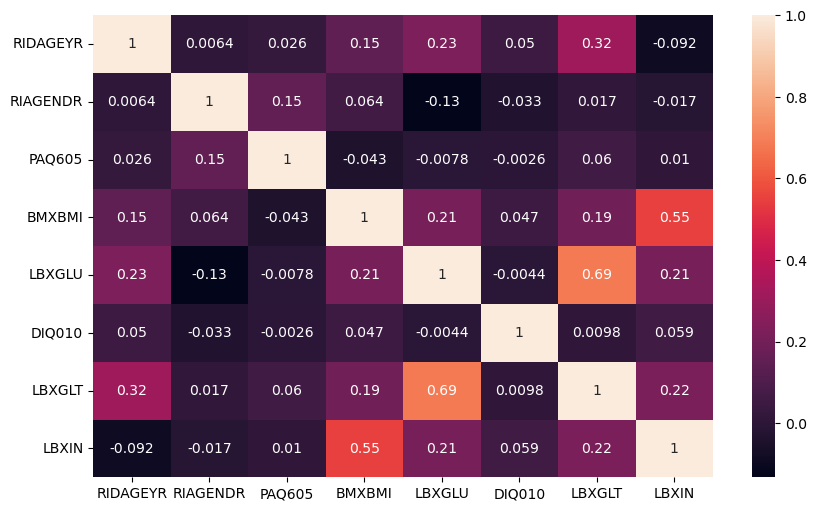

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(corr, annot=True, ax = axis)

**According to the heatmap above**, we can see that *RIAGENDR, PAQ605 and LBXGLU **negatively affect** the DIQ010* while *RIDAGEYR, BMXBMI, LBXGLT and LBXIN **positively affect** the DIQ010*.

**In addition**, the LBXIN is the highest component affecting the DIQ010, but the PAQ605 is the lowest component affecting the DIQ010. However, the effects between the highest and the lowest are not far. 

#### 4 Most affecting features
From the heatmap above, it can be seen that there are 3 features RIDAGEYR, RIAGENDR, BMXBMI, and LBXIN have absolute values, which are corresponding with the DIQ010, are higher than 0.01 which are 0.05, 0.033, 0.047, and 0.059, respectively.

Therefore, I choose these 3 features RIDAGEYR, BMXBMI, and LBXIN for the model. It has the form:
<center>
    $y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + \theta_4x_4$<br>
</center>

In [17]:
xs_4features = df[['RIDAGEYR', 'RIAGENDR', 'BMXBMI', 'LBXIN']].values.tolist()

A_4features = getA(xs_4features)

theta = OLS(A_4features, y)

theta

[[1.9941278531817404],
 [0.000499367081641031],
 [-0.012139530832917933],
 [0.000227928627133724],
 [0.001116964674604393]]

In [18]:
theta = OLS(A_4features, y)

RSS = calculateRMSE(A_4features, theta, y)
print('RSS: ', RSS)

RSS:  8.820376829256867


This result RSS above is slightly higher than the resut **8.813941060900078** in the problem A. So this model is not suitable.

#### 2 Most affecting features
Now I change the standard. Particularly, I chose features whose absolute values, which are corresponding with the DIQ010, are higher than 0.05. Therefore, there are 2 features RIDAGEYR and LBXIN equal to 0.05 and 0.059, respectively.

Now, the model has the form:
<center>
    $y = \theta_0 + \theta_1x_1 + \theta_2x_2$<br>
</center>

In [19]:
xs_2features = df[['RIDAGEYR', 'LBXIN']].values.tolist()

A_2features = getA(xs_2features)

theta = OLS(A_2features, y)

theta

[[1.9802608476505519], [0.0005142533142532193], [0.001224170362262631]]

In [20]:
theta = OLS(A_2features, y)

RSS = calculateRMSE(A_2features, theta, y)
print('RSS: ', RSS)

RSS:  8.82517324690271


This result RSS above is still slightly higher than the resut **8.813941060900078** in the problem A. So this model is not suitable.

#### 4 Positive affecting features
Now, I change the approach that choosing only the positive effect components which are RIDAGEYR, BMXBMI, LBXGLT and LBXIN. The model has the form:
<center>
    $y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + \theta_4x_4$<br>
</center>

In [21]:
xs_pos = df[['RIDAGEYR', 'BMXBMI', 'LBXGLT', 'LBXIN']].values.tolist()

A_pos = getA(xs_pos)

theta = OLS(A_pos, y)

theta

[[1.9844053658750351],
 [0.0005862599711303182],
 [0.00014169258153234765],
 [-0.0001032522825890138],
 [0.001288108602918304]]

In [22]:
theta = OLS(A_pos, y)

RSS = calculateRMSE(A_pos, theta, y)
print('RSS: ', RSS)

RSS:  8.822539911958229


This result RSS above is still slightly higher than the resut **8.813941060900078** in the problem A. So this model is not suitable.

#### 3 Negative affecting features
Now, I change the approach that choosing only the negative effect components which are RIAGENDR, PAQ605 and LBXGLU. The model has the form:
<center>
    $y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3$<br>
</center>

In [23]:
xs_neg = df[['RIAGENDR', 'PAQ605', 'LBXGLU']].values.tolist()

A_neg = getA(xs_neg)

theta = OLS(A_neg, y)

theta

[[2.042609838417277],
 [-0.01274219451292253],
 [0.0011709917572843575],
 [-9.284596653518477e-05]]

In [24]:
theta = OLS(A_neg, y)

RSS = calculateRMSE(A_neg, theta, y)
print('RSS: ', RSS)

RSS:  8.849194022045738


This result RSS above is still higher than the resut **8.813941060900078** in the problem A. So this model is not suitable.

#### Quadratic equation
According to all the models above, I conclude that all 7 features having the significant roles in the DIQ010. So I will choose all 7 features for the new model, but I did that in the problem a, which was a linear model. Therefore, I choose quadratic model which has the form:
<center>
    $y = \theta_0 + \theta_1x^2_1 + \theta_2x^2_2 + \theta_3x^2_3 + \theta_4x^2_4 + \theta_5x^2_5 + \theta_6x^2_6 + \theta_7x^2_7$<br>
</center>

In [25]:
X = df.drop(columns=['DIQ010'], axis=1).values.tolist()
y = df.DIQ010.values.tolist()
y = transposeMatrix(y)

def generateTheCorrespondanceMatrix(X):
    result = []
    
    for i in range(len(X)):
        new_features = [1]  # Start with the intercept term
        original_features = X[i]
    
        # Add squared features
        for j in range(len(original_features)):
            new_features.append(original_features[j] ** 2)

        result.append(new_features)
        
    return result
    
A = generateTheCorrespondanceMatrix(X)

In [26]:
theta = OLS(A, y)

RSS = calculateRMSE(A, theta, y)
print('RSS: ', RSS)

RSS:  8.810282265549803


This result RSS above is **smallest**, so the set of theta for the quadratic model is below:

In [27]:
theta

[[2.014616538878432],
 [5.758102816636596e-06],
 [-0.004955558586848635],
 [0.00023711181482046802],
 [1.8763384860379967e-05],
 [-1.420747333369488e-06],
 [-1.4459770348523645e-07],
 [8.87019823693754e-06]]